In [3]:
import pandas as pd
import glob
from functools import reduce

# '프로젝트1/data/y_rate_1' 폴더 내의 모든 '.csv' 파일을 찾습니다.
csv_files = glob.glob('../data/y_morning/*.csv')

# 모든 CSV 파일을 데이터프레임으로 읽고 리스트에 저장합니다.
dfs = [pd.read_csv(file, index_col=0) for file in csv_files]

# 모든 데이터프레임을 인덱스를 기준으로 합칩니다. 'outer'는 모든 인덱스를 유지합니다.
merged_df = reduce(lambda left, right: pd.merge(left, right, on='date', how='inner'), dfs)



In [4]:
merged_df.set_index('date',inplace=True)

In [5]:
merged_df=merged_df.dropna()

In [6]:
merged_df

,y_rate_0910,y_rate_0915,y_rate_0920,y_rate_0925,y_rate_0930,y_rate_0935,y_rate_0940,y_rate_0945,y_rate_0950,y_rate_0955,y_rate_1000,y_rate_1005,y_rate_1010,y_rate_1015,y_rate_1020,y_rate_1025,y_rate_1030
date,,,,,,,,,,,,,,,,,
20181001,54,32,5,0,-13,-112,-108,-121,-130,-126,-144,-135,-117,-103,-108,-112,-85
20181002,23,-4,32,27,36,36,54,59,68,72,59,41,27,-22,-54,-58,-54
20181004,-108,-166,-153,-193,-193,-220,-225,-256,-256,-243,-243,-270,-319,-315,-351,-333,-351
20181005,-27,-45,9,49,72,85,81,54,22,31,49,49,27,27,31,31,-5
20181008,18,23,41,59,86,77,81,72,99,108,99,86,99,194,162,176,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20231020,-35,-110,-150,-220,-195,-210,-265,-280,-300,-340,-300,-300,-280,-310,-330,-310,-295
20231023,-25,20,75,-40,-60,-60,5,55,0,5,25,40,0,-10,-20,55,45
20231024,-50,-70,-60,-150,-110,-115,-115,-155,-165,-195,-175,-210,-210,-235,-250,-290,-395


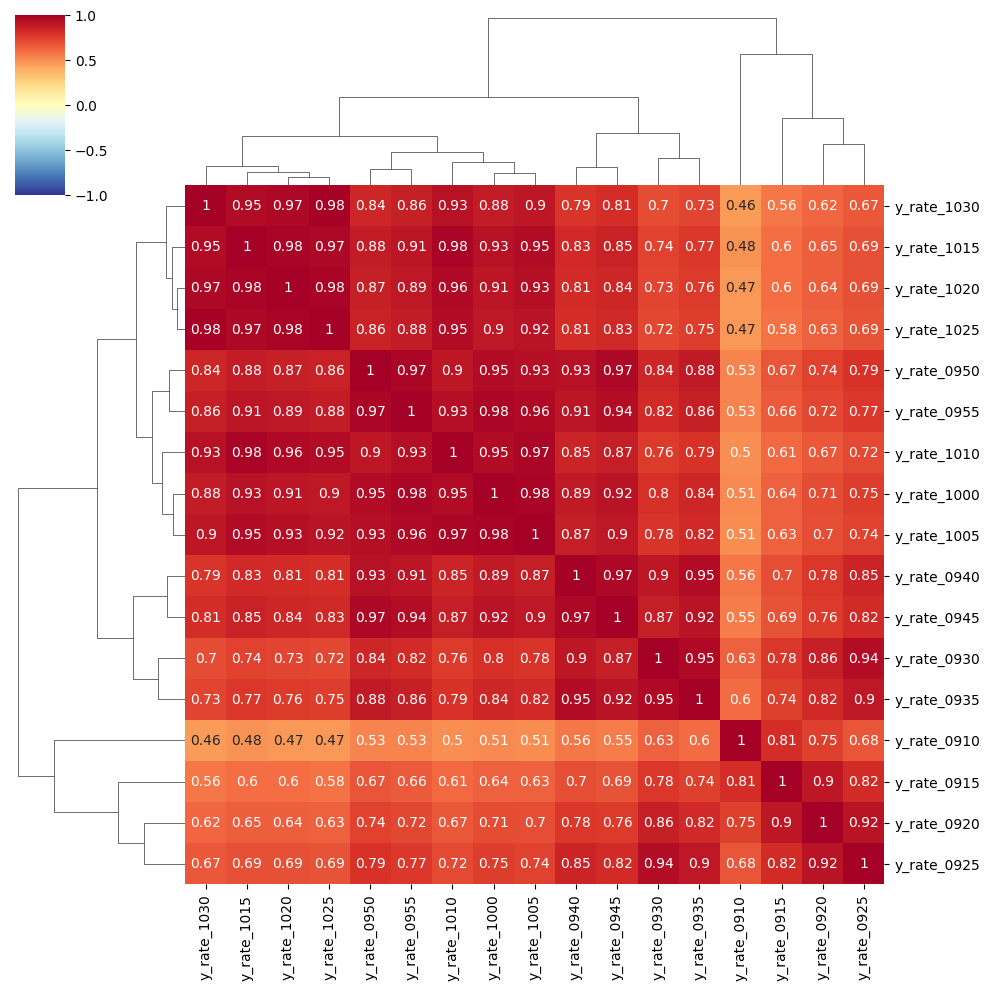

In [7]:

import seaborn as sns

df = merged_df.corr()

sns.clustermap(df, 
            annot = True,      # 실제 값 화면에 나타내기
            cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
            vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
            )